# Step 0. Parameter Setting

In [5]:
import dtnmonitor_v2 as dtn
import os,sys


### P1. SELECT THE MONITOR NETWORK INTERFACE
## used in Step 1,2,3 , if you don't know the interface name, you can use 'all'
## make sure the interface is correct, error_naming or without network flow will get empty grath
#dtn.interface = 'eth0.1301'
#dtn.interface = 'eth0.2038' 
dtn.interface = 'enp103s0'
#dtn.interface = 'eth1'
#dtn.interface = 'all'


### P2. SELECT THE INPUT FILE , 
## used in Step 1 : file IO read file



file_read_nuttcp=[
"/data1/waue/10gtest",
"/data2/waue/10gtest",
"/data3/waue/10gtest",
"/data4/waue/10gtest",
    # "/foo/bar/filennn"
     ]

file2_read_nuttcp=[
"/data1/waue/10gdata",
"/data2/waue/10gdata",
"/data3/waue/10gdata",
"/data4/waue/10gdata",
    # "/foo/bar/filennn"
     ]






### P3. NUTTCP SERVER IP 
## used in Step 2,3 : input nuttcp server's ip
nuttcp_server="192.168.100.1"

### P4. NUTTCP THREADS
## used in Step 2,3 :input threads number
count = 4

## run fio and check status
### select graph_mode [0|1] 
#graph_mode=0  # all, 
#graph_mode=1  # 100pt
graph_mode=0  

### Show Disk and Interface
import netifaces
import os
list=netifaces.interfaces()
print("==========================================================")
print('{:40s} {:20s} '.format("Network Interface","IP"))
print("==========================================================")
for inf in list:
    #print(inf)
    ff=netifaces.ifaddresses(inf)
    #print(ff)
    try:
        addr=ff[netifaces.AF_INET][0]['addr']
    except:
        continue
    print('{:40s} {:20s} '.format(inf,addr)) 
import subprocess
import re
df = subprocess.Popen(["df","-h"], stdout=subprocess.PIPE)
output = df.communicate()[0]
dfs = output.decode("utf8").split("\n")
dfs.pop(0)
print("==========================================================")
print('{:35s} {:7s}  {:7s} {:7s}'.\
      format("Disk mountpoint","size","avail","used%"))
print("==========================================================")
for i in dfs:
    try:
        xx = re.sub(" +"," ",i).split(" ")
        if len(xx) == 6:
            device, size, used, available, percent, mountpoint = xx
            print('{:35s} {:7s}  {:7s} {:7s}'\
                  .format(mountpoint,size,available,percent))
    except:
        continue
import getpass
user=getpass.getuser()
def exec_print(command):
    process = subprocess.Popen([command], stdout=subprocess.PIPE,stderr=subprocess.STDOUT, shell=True)
    for line in iter(process.stdout.readline, b''):
        # system print
        sys.stdout.write(line)   

Network Interface                        IP                   
lo                                       127.0.0.1            
enp103s0                                 192.168.100.2        
enp179s0                                 140.110.141.175      
docker0                                  172.17.0.1           
Disk mountpoint                     size     avail   used%  
/dev                                63G      63G     0%     
/run                                13G      13G     1%     
/                                   219G     178G    15%    
/dev/shm                            63G      63G     0%     
/run/lock                           5.0M     5.0M    0%     
/sys/fs/cgroup                      63G      63G     0%     
/data4                              745G     725G    3%     
/data1                              745G     725G    3%     
/data2                              745G     725G    3%     
/data3                              745G     725G    3%     
/var/lib/docke

In [6]:
print("==========================================================")
print('{:60s} '.format("Initial checking"))
print("==========================================================")

command="ps aux |grep 'python3 '|wc -l"
process = subprocess.Popen([command], stdout=subprocess.PIPE,stderr=subprocess.STDOUT, shell=True)
ret=process.stdout.read().decode('utf8')



if int(ret) > 2: 
    print("System check ..... [ok]")
    print("Error!! Some process are running, please check first!!!")
    exec_print("ps -u "+ user +" ux |grep 'python3 '")
else : 
    print("System check ..... [ok]")
    print('Monitoring Network Interface => {:15s} '.format(dtn.interface))

Initial checking                                             
System check ..... [ok]
Error!! Some process are running, please check first!!!
waue      2355  0.0  0.0   4628   812 ?        S    17:33   0:00 /bin/sh -c ps -u waue ux |grep 'python3 '
waue      2357  0.0  0.0  14428  1116 ?        S    17:33   0:00 grep python3 


# Step 1. Test network transfer by disk

In [7]:
for i in range(count):
    command = "nuttcp -t -i1 -sdz -xc "+str(i)+" -w 110M -P 5300"+str(i)+" -p 5310"+str(i)+ " "+ nuttcp_server +" < "+ file_read_nuttcp[i] +" & "
    print(command)
    #os.system(command)
    command = "nuttcp -t -i1 -sdz -xc "+str(i)+" -w 110M -P 5320"+str(i)+" -p 5330"+str(i)+ " "+ nuttcp_server +" < "+ file2_read_nuttcp[i] +" & "
    print(command)
    #os.system(command)
 


#dtn.exec_command("sleep 300",graph_mode)

nuttcp -t -i1 -sdz -xc 0 -w 110M -P 53000 -p 53100 192.168.100.1 < /data1/waue/10gtest & 
nuttcp -t -i1 -sdz -xc 0 -w 110M -P 53200 -p 53300 192.168.100.1 < /data1/waue/10gdata & 
nuttcp -t -i1 -sdz -xc 1 -w 110M -P 53001 -p 53101 192.168.100.1 < /data2/waue/10gtest & 
nuttcp -t -i1 -sdz -xc 1 -w 110M -P 53201 -p 53301 192.168.100.1 < /data2/waue/10gdata & 
nuttcp -t -i1 -sdz -xc 2 -w 110M -P 53002 -p 53102 192.168.100.1 < /data3/waue/10gtest & 
nuttcp -t -i1 -sdz -xc 2 -w 110M -P 53202 -p 53302 192.168.100.1 < /data3/waue/10gdata & 
nuttcp -t -i1 -sdz -xc 3 -w 110M -P 53003 -p 53103 192.168.100.1 < /data4/waue/10gtest & 
nuttcp -t -i1 -sdz -xc 3 -w 110M -P 53203 -p 53303 192.168.100.1 < /data4/waue/10gdata & 


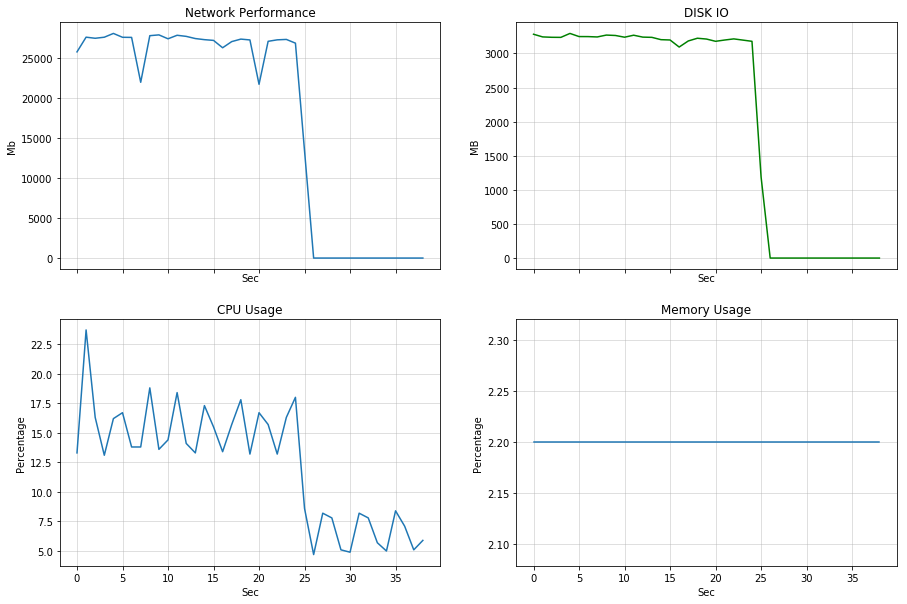

None

In [8]:
for i in range(count):
    command = "nuttcp -t -i1 -sdz -xc "+str(i)+" -w 110M -P 5300"+str(i)+" -p 5310"+str(i)+ " "+ nuttcp_server +" < "+ file_read_nuttcp[i] +" & "
    #print(command)
    os.system(command)
    command = "nuttcp -t -i1 -sdz -xc "+str(i)+" -w 110M -P 5320"+str(i)+" -p 5330"+str(i)+ " "+ nuttcp_server +" < "+ file2_read_nuttcp[i] +" & "
    os.system(command)
 


dtn.exec_command("sleep 300",graph_mode)